In [7]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
oo = pd.read_csv('Summer Olympic medallists 1896 to 2008 - ALL.csv', skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Task #L10.2

### На какой дистанции Jesse Owens выйграл медаль?

In [9]:
print('Jesse Owens won in:')
for distantion in oo[(oo.Athlete.str.contains('OWENS')) & oo.Event.str.contains(r'[0-9]')].Event:
    print('-', distantion)

Jesse Owens won in:
- 100m
- 200m
- 4x100m relay


## Task #L10.3

### Используя  groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде.

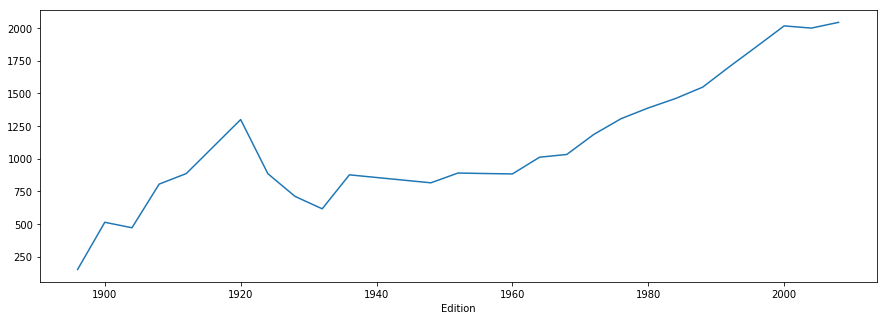

In [10]:
oo.groupby(['Edition','Medal']).size().unstack('Medal',fill_value=0).sum(axis=1).plot(kind='line', figsize=(15,5))

## Task #L10.4

### Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике?

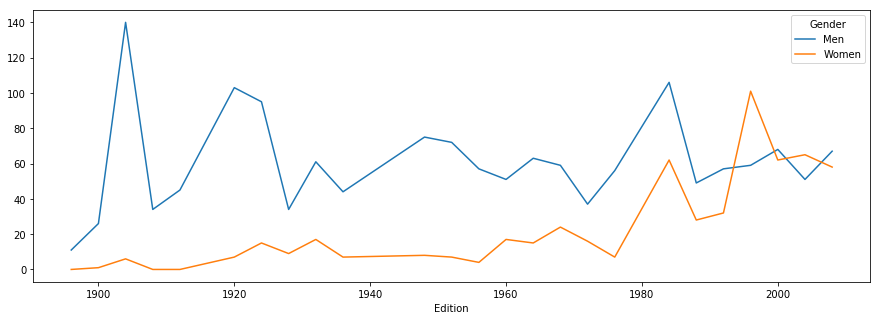

In [121]:
oo[(oo.NOC == 'USA') & (oo.Medal == 'Gold')].groupby(['Edition', 'Gender']).size() \
.unstack('Gender', fill_value=0).plot(kind='line', figsize=(15, 5))

### Постройте график 5 атлетов которые выйграли большинство золотых медалей. 

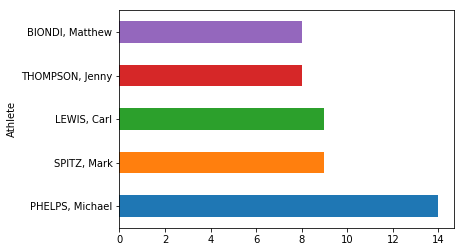

In [131]:
oo[(oo.NOC == 'USA') & (oo.Medal == 'Gold')].groupby(['Athlete', 'Edition']).size() \
.unstack('Edition', fill_value=0).sum(axis=1).sort_values(ascending=False).head().plot(kind='barh')